# Fashion classification

In [96]:
# connecting to https://github.com/alexeygrigorev/clothing-dataset-small and access to the train folder
# and download the images to the local machine
import numpy as np
import matplotlib.pyplot as plt
import os
import requests 
import re
import urllib.request
import urllib.parse
import matplotlib.pyplot as plt


In [97]:
from PIL import Image # python image library

In [98]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...


remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 23.06 MiB/s, done.
Resolving deltas: 100% (10/10), done.


## 8.1 Tensorflow and Keras

In [99]:
import tensorflow as tf
from tensorflow import keras

In [100]:
# load the images
from tensorflow.keras.preprocessing.image import load_img

In [101]:
path = './clothing-dataset-small/train/t-shirt'
name = '0aa095c3-9d4d-4416-8788-82655af859a8.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))

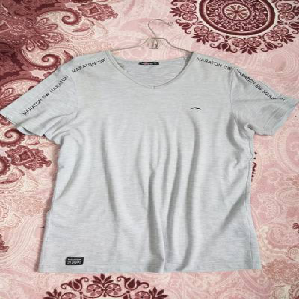

In [102]:
img

In [103]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 pre-trained convulotional neural networks

models created in keras.io

Xception is fast and accurate https://keras.io/api/applications/xception/

In [104]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions # decode the predictions

In [105]:
model = Xception(weights='imagenet' , input_shape=(299, 299, 3))


In [106]:
X = np.array([x])

In [107]:
X = preprocess_input(X)

In [108]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


In [109]:
pred # the output is the probability of each class

array([[1.33592126e-04, 2.00074064e-04, 1.39770680e-04, 9.42985280e-05,
        2.27636760e-04, 1.43124416e-04, 2.44549563e-04, 7.23329795e-05,
        1.01383608e-04, 1.26775456e-04, 2.49042991e-04, 1.72880231e-04,
        8.37159023e-05, 1.23231846e-04, 1.18427306e-04, 1.54962181e-04,
        3.02411994e-04, 1.51962638e-04, 1.54894078e-04, 2.01821036e-04,
        5.71106037e-04, 1.47877377e-04, 2.91030272e-04, 1.79659532e-04,
        3.08735674e-04, 9.56367367e-05, 1.52511566e-04, 2.15294145e-04,
        2.47479184e-04, 1.44418053e-04, 1.95722125e-04, 1.58356619e-04,
        2.58639659e-04, 4.27470542e-04, 4.72175510e-04, 3.12571472e-04,
        1.77972484e-04, 1.48943276e-04, 3.57474608e-04, 2.77843035e-04,
        1.21177705e-04, 3.80713580e-04, 6.20144419e-04, 6.18168386e-04,
        5.71138982e-04, 2.21950118e-04, 2.20482325e-04, 2.18415022e-04,
        3.25314555e-04, 3.98042437e-04, 3.97087744e-04, 1.71015286e-04,
        8.43556365e-04, 1.15425303e-03, 6.86484389e-04, 4.625588

In [110]:
decode_predictions(pred) # the output is the class name and the probability

[[('n03595614', 'jersey', 0.6609438),
  ('n03877472', 'pajama', 0.033283092),
  ('n03710637', 'maillot', 0.027335906),
  ('n04525038', 'velvet', 0.024979703),
  ('n04370456', 'sweatshirt', 0.014257425)]]

as this model is very general and does not have tshirt, is not fittig our purpose

but we can built on top, not neccesary starting from scratch

## 8.4 convolutional neural networks

## 8.5 Transfer learning

reuse conv layers and train our dense layer for our purpuse

In [111]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [112]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150), # train model faster by using smaller images
    batch_size=32 # number of images to process at once, 32 images at once. we will have 32 vectors of 150x150x3
)

Found 3068 images belonging to 10 classes.


In [113]:
train_ds.class_indices # the output is the class name and the index

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [114]:
X, y = next(train_ds) # x is the image and y is the label

In [115]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [116]:
y[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

here we see that is 1 in the second class, so it means is a hat. similar than in one hot encoding

the 1 in the last indice meand is a tshirt

In [117]:
X[5]

array([[[-0.32549018, -0.42745095, -0.5529412 ],
        [-0.2862745 , -0.38823527, -0.5137255 ],
        [-0.2862745 , -0.38823527, -0.5137255 ],
        ...,
        [-0.654902  , -0.69411767, -0.7411765 ],
        [-0.6862745 , -0.70980394, -0.7490196 ],
        [-0.7647059 , -0.7882353 , -0.827451  ]],

       [[-0.30196077, -0.40392154, -0.5294118 ],
        [-0.3098039 , -0.41176468, -0.5372549 ],
        [-0.29411763, -0.3960784 , -0.52156866],
        ...,
        [-0.6862745 , -0.7254902 , -0.77254903],
        [-0.7647059 , -0.7882353 , -0.827451  ],
        [-0.8352941 , -0.85882354, -0.8980392 ]],

       [[-0.2862745 , -0.38823527, -0.5137255 ],
        [-0.3098039 , -0.41176468, -0.5372549 ],
        [-0.2862745 , -0.38823527, -0.5137255 ],
        ...,
        [-0.69411767, -0.73333335, -0.78039217],
        [-0.7882353 , -0.8117647 , -0.8509804 ],
        [-0.8666667 , -0.8901961 , -0.92941177]],

       ...,

       [[-0.5372549 , -0.6       , -0.7647059 ],
        [-0

In [118]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


using xception to get the conv layer
we say include_top flase means that we dont need to include the dense layers

In [119]:
base_model = Xception(weights='imagenet', 
                      include_top=False, # we are not including the last layer
                      input_shape=(150, 150, 3)
                      ) # include_top=False means that we are not including the last layer

base_model.trainable = False # we are not training the model

create a new top layer

In [120]:
inputs = keras.Input(shape=(150, 150, 3)) # input layer

base = base_model(inputs, training=False) # the output of the base model. training=False means that we are not training the model

outputs = base 

model = keras.Model(inputs=inputs, outputs=outputs)

In [121]:
preds = model.predict(X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [122]:
preds.shape

(32, 5, 5, 2048)

inputs = keras.Input(shape=(150, 150, 3)) # input layer

base = base_model(inputs)

outputs = base 

model = keras.Model(inputs=inputs, outputs=outputs)

In [123]:
inputs = keras.Input(shape=(150, 150, 3)) # input layer

base = base_model(inputs, training=False) # the output of the base model

# pooling = keras.layers.GlobalAveragePooling2D()
# vectors = pooling(base)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = vectors

model = keras.Model(inputs=inputs, outputs=outputs)

In [124]:
preds = model.predict(X)

preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step


(32, 2048)

In [125]:
inputs = keras.Input(shape=(150, 150, 3)) # input layer

base = base_model(inputs, training=False) # the output of the base model. training=False means that we are not training the model

# pooling = keras.layers.GlobalAveragePooling2D()
# vectors = pooling(base)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

#outputs = keras.layers.Dense(10, activation='softmax')(vectors)

model = keras.Model(inputs=inputs, outputs=outputs)

In [126]:
preds = model.predict(X)

preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step


(32, 10)

In [127]:
preds[0]

array([-0.6532967 , -0.11687744,  0.20892733, -0.62045544, -0.1476281 ,
       -0.4714759 ,  0.0862152 , -0.5361552 ,  0.36204576, -0.3299787 ],
      dtype=float32)

we havent trained yet the model

we train the model by using the optimizer, there are multiple but we will use Adam.
optimizer is using gradient descent and what it does is changing the w1,w2.... 

Adam has multiple parameters but learning rate is the most important one. 


In [128]:
optimizer = keras.optimizers.Adam(learning_rate=0.01) # optimizer is used to minimize the loss function by updating the weights of the model

loss = keras.losses.CategoricalCrossentropy(from_logits=True) # meansquarederror when is regression
# from_logits=True means that the output is not normalized. If we have false, we need to use softmax activation function inside the model like outputs = keras.layers.Dense(10, activation='softmax')(vectors)


In [129]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [130]:

# history = model.fit(train_ds, 
#                     epochs=10, 
#                     validation_data=val_ds) # epochs is the number of times that the model will see the data, we have 32 batches, so we have 32*10 = 320 images. Go over the data 10 times



In [131]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0, 1])

# 8.6 Learnig rate
tells how fas you read. the fastest you learn the lowest quality learning. Less learning rate might cause underfit and learning rate high might cause overfit. Important to find good balance. 

In [132]:
def make_model(learning_rate=0.01):
    base_model.trainable = False
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy']
                )
    return model

In [133]:
# scores = {}
# for lr in [0.0001, 0.1, 0.01, 0.001]:
#     print(f'lr={lr}')
#     model = make_model(learning_rate=lr)
#     history = model.fit(train_ds, epochs=10, validation_data=val_ds)
#     scores[lr] = history.history
#     print()
#     print()

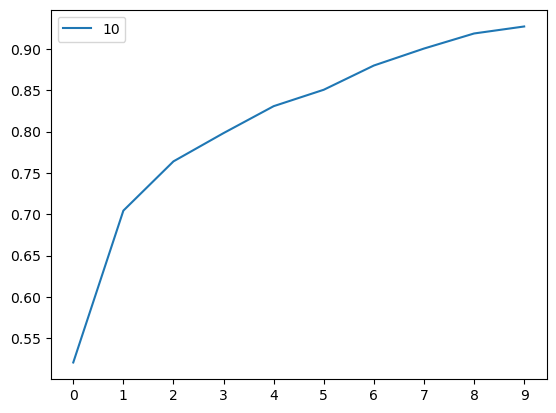

In [134]:
for lr , hist in scores.items():
    plt.plot(hist['accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.legend()

In [135]:
# for lr , hist in scores.items():
#     plt.plot(hist['val_accuracy'], label=lr)
# plt.xticks(np.arange(10))
# plt.legend()

## 8.7 Checkpointing
Saving the model when the accuracy is higher

In [136]:
model.save_weights('model_v1.weights.h5')

In [137]:
checkpoint = keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.2f}.h5.keras', 
                                save_best_only=True, 
                                monitor='val_accuracy', 
                                mode='max'
                                )

In [138]:
# learning_rate = 0.001

# model = make_model(learning_rate=learning_rate)
# history = model.fit(train_ds, 
#                     epochs=10, 
#                     validation_data=val_ds,
#                     callbacks=[checkpoint]
#                     )

## 8.8 Adding more layers

In [139]:
def make_model(learning_rate=0.01,size_inner=100):
    base_model.trainable = False
    #########################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    #########################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy']
                )
    return model

In [140]:
learning_rate = 0.001
scores = {}
for size in [10, 100, 1000]:
    print(f'size={size}')
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    print()
    print()

size=10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 64s 648ms/step - accuracy: 0.3636 - loss: 1.8912 - val_accuracy: 0.6422 - val_loss: 1.1541
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 652ms/step - accuracy: 0.6466 - loss: 1.0953 - val_accuracy: 0.7273 - val_loss: 0.8650
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 792ms/step - accuracy: 0.7138 - loss: 0.8169 - val_accuracy: 0.7243 - val_loss: 0.8004
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 863ms/step - accuracy: 0.7323 - loss: 0.7307 - val_accuracy: 0.7449 - val_loss: 0.7577
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.7798 - loss: 0.6086 - val_accuracy: 0.7566 - val_loss: 0.7098
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8384 - loss: 0.5042 - val_accuracy: 0.7683 - val_loss: 0.6801
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8631 - loss: 0.4481 - val_accuracy: 0.7889 - val_loss: 0.6262
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.8859 - loss: 0.4056 - val_accu

2024-12-26 19:33:37.812265: W tensorflow/core/framework/op_kernel.cc:1828] UNKNOWN: UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x30077a810>
Traceback (most recent call last):

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self.py_dataset[i]

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/ke

 3/96 ━━━━━━━━━━━━━━━━━━━━ 1:09 747ms/step - accuracy: 0.9913 - loss: 0.0755

2024-12-26 19:33:38.856498: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: UNKNOWN: UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x30077a810>
Traceback (most recent call last):

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self.py_dataset[i]

  File "/opt/anaconda3/e

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x30077a810>
Traceback (most recent call last):

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self.py_dataset[i]

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/PIL/Image.py", line 3536, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x30077a810>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_189625]

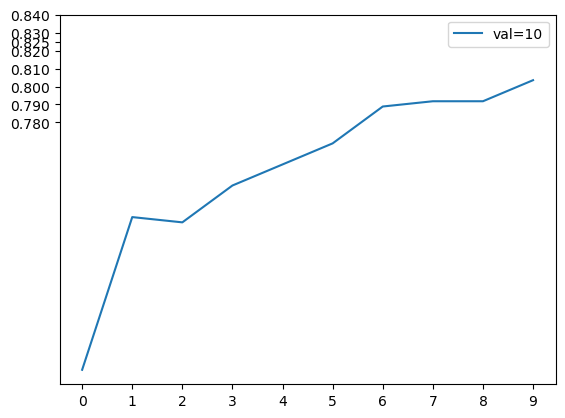

In [141]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.79, 0.80, 0.81, 0.82, 0.825, 0.83, 0.84])
plt.legend()

## 8.9 Regularization and dropout


frozen parts of the inner layer

In [142]:
def make_model(learning_rate=0.01,size_inner=100,droprate=0.2):
    base_model.trainable = False
    #########################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop=keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    #########################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy']
                )
    return model

In [143]:
learning_rate = 0.001
size_inner = 100

scores = {}

for droprate in [0.0,0.2,0.5]:
    print(f'size={size}')
    model = make_model(learning_rate=learning_rate, 
                       size_inner=size,
                       droprate=droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    print()
    print()

size=10
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 612ms/step - accuracy: 0.4135 - loss: 1.8560 - val_accuracy: 0.5806 - val_loss: 1.2402
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 57s 598ms/step - accuracy: 0.5940 - loss: 1.1985 - val_accuracy: 0.6686 - val_loss: 0.9625
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 654ms/step - accuracy: 0.7022 - loss: 0.8812 - val_accuracy: 0.7361 - val_loss: 0.8357
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 66s 682ms/step - accuracy: 0.7772 - loss: 0.7140 - val_accuracy: 0.7595 - val_loss: 0.7389
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 64s 663ms/step - accuracy: 0.8145 - loss: 0.5855 - val_accuracy: 0.7830 - val_loss: 0.6770
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 658ms/step - accuracy: 0.8425 - loss: 0.5074 - val_accuracy: 0.7918 - val_loss: 0.6538
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 65s 673ms/step - accuracy: 0.8698 - loss: 0.4326 - val_accuracy: 0.7889 - val_loss: 0.6472
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 66s 689ms/step - accuracy: 0.8874 - loss: 0.3822 - 

2024-12-26 20:08:17.123771: W tensorflow/core/framework/op_kernel.cc:1828] UNKNOWN: FileNotFoundError: [Errno 2] No such file or directory: './clothing-dataset-small/train/shirt/2a45d48d-811c-4c7d-bceb-b8bd88af2821.jpg'
Traceback (most recent call last):

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self.py_dataset[i]

  File "/opt/anaconda3/

10/96 ━━━━━━━━━━━━━━━━━━━━ 2:43 2s/step - accuracy: 0.9777 - loss: 0.1238

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
FileNotFoundError: [Errno 2] No such file or directory: './clothing-dataset-small/train/shirt/2a45d48d-811c-4c7d-bceb-b8bd88af2821.jpg'
Traceback (most recent call last):

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self.py_dataset[i]

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/opt/anaconda3/envs/ml-zoomcamp39/lib/python3.9/site-packages/keras/src/utils/image_utils.py", line 235, in load_img
    with open(path, "rb") as f:

FileNotFoundError: [Errno 2] No such file or directory: './clothing-dataset-small/train/shirt/2a45d48d-811c-4c7d-bceb-b8bd88af2821.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_206873]

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.xticks(np.arange(30))
plt.ylim([0.78, 0.86])
plt.legend()

In [ ]:
hist = scores[0.5]
plt.plot(hist['accuracy'], label='accuracy')
plt.plot(hist['val_accuracy'], label = 'val_accuracy')

In [ ]:
hist = scores[0.2]
plt.plot(hist['accuracy'], label='accuracy')
plt.plot(hist['val_accuracy'], label = 'val_accuracy')

## 8.10 Data Augmentation

generate more images from existing.
Possible image transformations:
- flip
- rotation
- shift
- shear
- zoom in/out
- brightness/contrast
- black patch



how to choose augmentations:
- own judgements. for example horizontal flip does not make sense as always are ok in pur photos.
- look at the dataset ans see what type of augmentations they have
- tune it as a hyperparameter: is better with that or not

In [ ]:
# train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                #rotation_range=30, # did not work better
#                                #width_shift_range=10.0,# did not work better
#                                #height_shift_range=10.0,# did not work better
#                                #shear_range=1.0,
#                                #zoom_range=0.1,
#                                #horizontal_flip=False,
#                                vertical_flip=True
#                                  )
# train_ds = train_gen.flow_from_directory(
#     './clothing-dataset-small/train',
#     target_size=(150, 150),
#     batch_size=32
# )

# val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# val_ds = val_gen.flow_from_directory(
#     './clothing-dataset-small/validation',
#     target_size=(150, 150),
#     batch_size=32,
#     shuffle=False
# )

In [ ]:
learning_rate = 0.001
size_inner = 100
droprate = 0.2

model = make_model(learning_rate=learning_rate,
                     size_inner=size_inner,
                     droprate=droprate)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

## 8.11 training a larger model

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
input_size = 299

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

## 8.12 Using the model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

In [ ]:
model = keras.models.load_model('xception_v4_1_13_0.903.h5')

In [ ]:
model.evaluate(test_ds)

In [ ]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [ ]:
img = load_img(path, target_size=(299, 299))

In [ ]:
import numpy as np

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

In [ ]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [ ]:
dict(zip(classes, pred[0]))

{'dress': -1.4282539,
 'hat': -5.522186,
 'longsleeve': -3.1655293,
 'outwear': -2.201648,
 'pants': 9.294684,
 'shirt': -3.4289198,
 'shoes': -4.2395606,
 'shorts': 3.4339347,
 'skirt': -4.194675,
 't-shirt': -2.9939806}